In [32]:
import seaborn as sns
sns.set_style('white')
flatui = ['#3498db', '#a6901b', '#e8a6ca','#a2b4c5', '#2ecc71', 
          '#d40b51', '#543cee']
sns.set_palette(flatui)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
sys.path.append('/home/jevjev/Dropbox/Projects/Intrinsic-dimensionality/')
from src.utils.train import get_exponential_range
from collections import OrderedDict

In [9]:
path = "/home/jevjev/mnist"
files = os.listdir(path)
print(files)

['cnn-dense.csv', 'fcn-dense.csv', 'fcn-fastfood.csv', 'cnn-fastfood.csv']


In [10]:
dims =  list(get_exponential_range(3, 14))

In [13]:
losses = {}
for file in files:
    name = file.split('.')[0]
    f_path = os.path.join(path, file)
    dts = pd.read_csv(f_path, header=0)['Value'].values
    losses[name] = dts
# losses['Steps'] = np.arange(len(dts))
df = pd.DataFrame(losses, index=dims[:-1])

In [19]:
df

,cnn-dense,fcn-dense,fcn-fastfood,cnn-fastfood
100,0.4765,0.6259,0.6667,0.4143
200,0.6229,0.7911,0.7699,0.6274
300,0.7100,0.8441,0.8450,0.7102
400,0.7581,0.8693,0.8702,0.7463
500,0.8085,0.8887,0.8791,0.8099
600,0.8316,0.9041,0.8909,0.8275
700,0.8673,0.9033,0.8968,0.8467
800,0.8697,0.9180,0.9083,0.8475
900,0.8821,0.9220,0.9153,0.8733
1000,0.8728,0.9262,0.9256,0.8860


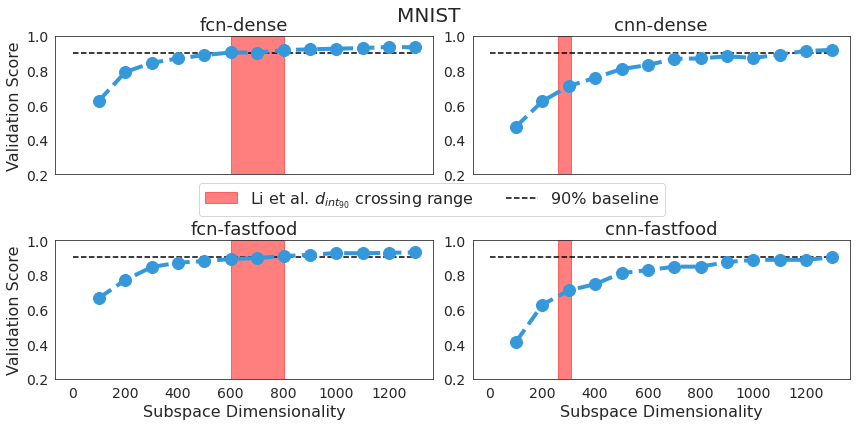

In [117]:
types = OrderedDict([('fcn-dense',[600, 800]), 
          ('cnn-dense',[260, 310]), 
          ('fcn-fastfood',[600, 800]), 
          ('cnn-fastfood',[260, 310])])
y = [0.2, 0.4, 0.6, 0.8, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
fig.subplots_adjust(bottom=0.5)
axes = [item for sublist in axes for item in sublist]
for i, task in enumerate(types.keys()):
    ax = axes[i]
    acc = df[task].values
    x = df.index.values
    ax.plot(x, acc, '--o', linewidth=4.0, markersize=12)
    ax.set_title(task)
    
    ranges = types[task]
    ax.axvspan(ranges[0], ranges[1], alpha=0.5, color='red', label='Li et al. $d_{int_{90}}$ crossing range')
    ax.hlines(0.9, 0, x[-1], linestyles='dashed' , label="90% baseline")
    ax.set_yticks(y)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.title.set_size(18)
    ax.title.set_size(18)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    
    if (i == 0) or (i == 2):
        ax.set_ylabel('Validation Score')
    if (i == 2) or (i == 3):
        ax.set_xlabel('Subspace Dimensionality')
        
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=16, loc="center", ncol=2, bbox_to_anchor=[0.5, 0.524])
fig.suptitle('MNIST', fontsize=20)
fig.tight_layout()
plt.savefig("mnist_reproduction.png", dpi=400)